In [24]:
from importlib.machinery import SourceFileLoader
helpers = SourceFileLoader("helpers", "../helpers.py").load_module()
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

network_intrusion_data_frame = pd.read_csv('./dataset/network_intrusion_data.csv')

print(network_intrusion_data_frame.size)



def label_encoder(label):
    if(label == 'normal.'):
        return '0'
    return '1'


columns = [
    'duration',   
    'protocol_type',    
    'service',    
    'flag',    
    'src_bytes',    
    'dst_bytes',    
    'land',    
    'wrong_fragment',    
    'urgent',    
    'hot',    
    'num_failed_logins',    
    'logged_in',    
    'num_compromised',    
    'root_shell',    
    'su_attempted',
    'num_root',    
    'num_file_creations',    
    'num_shells',    
    'num_access_files',    
    'num_outbound_cmds',    
    'is_host_login',   
    'is_guest_login',   
    'count',  
    'srv_count',  
    'serror_rate',   
    'srv_serror_rate', 
    'rerror_rate',  
    'srv_rerror_rate', 
    'same_srv_rate',   
    'diff_srv_rate',    
    'srv_diff_host_rate',  
    'dst_host_count', 
    'dst_host_srv_count',  
    'dst_host_same_srv_rate', 
    'dst_host_diff_srv_rate',    
    'dst_host_same_src_port_rate',  
    'dst_host_srv_diff_host_rate',  
    'dst_host_serror_rate',  
    'dst_host_srv_serror_rate',  
    'dst_host_rerror_rate',   
    'dst_host_srv_rerror_rate',    
    'outcome'] 


network_intrusion_data_frame.columns = columns

# drop rows with missing values since data is not complete
network_intrusion_data_frame.dropna()

# drop redudant rows so we do not get biased data in testing phase
network_intrusion_data_frame.drop_duplicates(keep='first', inplace=True)

# here i encoded all normal outcomes to 0 and attacks to 1
network_intrusion_data_frame['outcome'] = network_intrusion_data_frame['outcome'].map(label_encoder)

stringColumnsToEncode = ['protocol_type', 'service', 'flag']

outcome = helpers.encode_text_index(network_intrusion_data_frame,'outcome')

for x in columns:
    if(x != 'outcome'):
        helpers.encode_text_index(network_intrusion_data_frame, x)
    

x,y = helpers.to_xy(network_intrusion_data_frame, 'outcome')

x_train, x_test, y_train, y_test = train_test_split(x, y)

print('done')







20748840
done


# Fully-Connected Neural Network Training 



In [ ]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)

     # Build network
    model = Sequential()
    model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=100)


0
Train on 109188 samples, validate on 36397 samples
Epoch 1/100
109188/109188 - 4s - loss: 0.4189 - val_loss: 0.1009
Epoch 2/100
109188/109188 - 4s - loss: 0.1057 - val_loss: 0.0828
Epoch 3/100
109188/109188 - 4s - loss: 0.0734 - val_loss: 0.0666
Epoch 4/100
109188/109188 - 4s - loss: 0.0576 - val_loss: 0.0219
Epoch 5/100
109188/109188 - 3s - loss: 0.0318 - val_loss: 0.0301
Epoch 6/100
109188/109188 - 4s - loss: 0.0225 - val_loss: 0.0121
Epoch 7/100
109188/109188 - 4s - loss: 0.0168 - val_loss: 0.0110
Epoch 8/100
109188/109188 - 4s - loss: 0.0133 - val_loss: 0.0085
Epoch 9/100
109188/109188 - 4s - loss: 0.0099 - val_loss: 0.0086
Epoch 10/100
109188/109188 - 4s - loss: 0.0095 - val_loss: 0.0071
Epoch 11/100
109188/109188 - 4s - loss: 0.0088 - val_loss: 0.0107
Epoch 12/100
109188/109188 - 4s - loss: 0.0083 - val_loss: 0.0077
Epoch 13/100
109188/109188 - 4s - loss: 0.0080 - val_loss: 0.0100
Epoch 14/100
109188/109188 - 4s - loss: 0.0083 - val_loss: 0.0078
Epoch 15/100
109188/109188 - 4s 

Final accuracy: 0.9985438360304421
Plotting confusion matrix


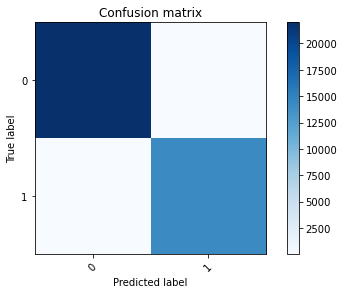

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22013
           1       1.00      1.00      1.00     14384

    accuracy                           1.00     36397
   macro avg       1.00      1.00      1.00     36397
weighted avg       1.00      1.00      1.00     36397



In [21]:
model = Sequential()
model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.load_weights('best_weights.hdf5') # load weights from best model


pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test,axis=1)


score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))
    

cm = confusion_matrix(y_true, pred)

print('Plotting confusion matrix')

plt.figure()
helpers.plot_confusion_matrix(cm, outcome)
plt.show()

print(classification_report(y_true, pred))

# print(classification_report(y_true, pred))